## Examen de conocimiento ejemplo: Programación.
### Maestria en Ciencia de Datos

#### Adrian Emilio Vazquez Icedo


### 1-Lectura y procesamiento de datos

a) Lectura del archivo bikes.csv que contine la información. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bikes.csv', sep=";", encoding='utf-8', parse_dates=['Date'], dayfirst=True)
df.head()


,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,2012-01-01,35,NaN,0,38,51,26,10,16,NaN
1,2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2,2012-01-03,135,NaN,2,104,248,89,3,58,NaN
3,2012-01-04,144,NaN,1,116,318,111,8,61,NaN
4,2012-01-05,197,NaN,2,124,330,97,13,95,NaN


b) Se analizan los datos que se tienen y se limpian datos nulos que tenga el documento.

In [2]:
df.dtypes

Date                                   datetime64[ns]
Berri 1                                         int64
Brébeuf (données non disponibles)             float64
Côte-Sainte-Catherine                           int64
Maisonneuve 1                                   int64
Maisonneuve 2                                   int64
du Parc                                         int64
Pierre-Dupuy                                    int64
Rachel1                                         int64
St-Urbain (données non disponibles)           float64
dtype: object

In [3]:
col_names = df.columns.tolist()

for column in col_names:
    print ("Valores nulos en <{0}>: {1}".format(column, df[column].isnull().sum()))

Valores nulos en <Date>: 0
Valores nulos en <Berri 1>: 0
Valores nulos en <Brébeuf (données non disponibles)>: 310
Valores nulos en <Côte-Sainte-Catherine>: 0
Valores nulos en <Maisonneuve 1>: 0
Valores nulos en <Maisonneuve 2>: 0
Valores nulos en <du Parc>: 0
Valores nulos en <Pierre-Dupuy>: 0
Valores nulos en <Rachel1>: 0
Valores nulos en <St-Urbain (données non disponibles)>: 310


c) Se eliminan las columnas que no contienen datos validos.

In [4]:
dfLimpio = df.dropna(how='all', axis=1)
dfLimpio.head()

,Date,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
0,2012-01-01,35,0,38,51,26,10,16
1,2012-01-02,83,1,68,153,53,6,43
2,2012-01-03,135,2,104,248,89,3,58
3,2012-01-04,144,1,116,318,111,8,61
4,2012-01-05,197,2,124,330,97,13,95


##### Grafica de bicicletas retiradas por día para la estación "Berri 1".

<AxesSubplot:xlabel='Date'>

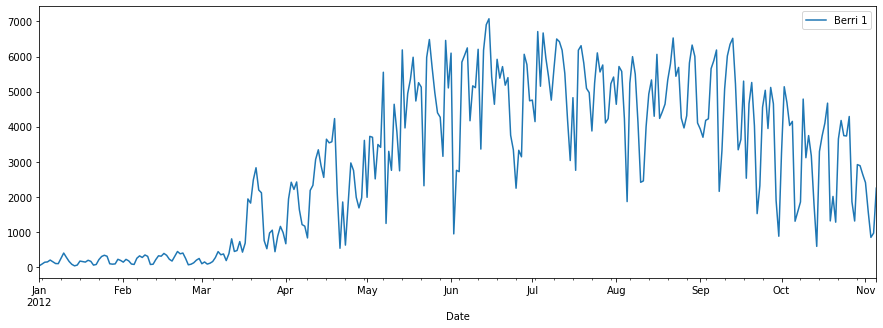

In [5]:
dfLimpio.plot(y="Berri 1", x="Date", figsize=(15,5))

##### Extraer el numero de trayectos acumulados realizado por estación y por més del año.

In [6]:
dfM=dfLimpio.groupby(by=[dfLimpio['Date'].dt.month]).sum()
dfM.index.name="Mes"
dfM

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Mes,,,,,,,
1,4915,38,3308,7737,3088,160,1140
2,6712,51,4573,10226,4852,240,73
3,26229,11388,18194,35736,21487,6634,26437
4,67699,29137,49312,85786,46048,16195,71759
5,133274,54360,94224,154609,78355,50130,129590
6,144849,58826,95213,169227,86190,53043,146530
7,162562,59657,101969,182673,88010,80033,150703
8,149227,61589,95110,168556,84261,57583,137377
9,127061,57986,83540,147277,86611,42328,123757


##### Extraer el número  de trayectos promedio por estación ( y de ser posible su desviación estandar) por cada día de la semana.

In [7]:
dfD=dfLimpio.groupby(by=[df['Date'].dt.dayofweek]).agg(['mean', 'std'])
dfD.head()

Berri 1              Côte-Sainte-Catherine               \
             mean          std                  mean          std   
Date                                                                
0     2984.400000  2093.291975           1340.644444   973.810630   
1     3075.113636  2151.083580           1334.272727   989.311162   
2     3476.636364  2302.985737           1530.545455  1066.272282   
3     3639.340909  2370.078754           1568.818182  1061.620619   
4     3222.068182  2288.254361           1282.863636   915.197236   

     Maisonneuve 1              Maisonneuve 2                   du Parc  \
              mean          std          mean          std         mean   
Date                                                                      
0      2001.133333  1387.750626   3639.266667  2402.431348  2004.088889   
1      2091.704545  1401.825331   3770.000000  2470.963902  2077.250000   
2      2383.886364  1557.945893   4228.659091  2665.287052  2320.522727   
3      2543.068182  1639.331165   4470.795455  2783.461669  2401.681818   
4      2240.181818  1563.948793   3917.954545  2620.149267  2042.545455   

                  Pierre-Dupuy                   Rachel1               
              std         mean          std         mean          std  
Date                                                                   
0     1342.144634  1026.755556  1030.123363  2891.777778  2010.232538  
1     1355.391441   799.250000   853.407237  2729.272727  1939.308512  
2     1442.777159   983.250000   933.515190  3024.727273  2044.024705  
3     1463.745511  1031.477273   912.220559  3187.295455  2116.135108  
4     1339.290431   965.227273   939.619935  3119.431818  2222.013621

a) Establesco los dias de la semana como los index de la tabla.

In [8]:
dfD["Dia"]=['Lunes', 'Martes', 'Miercoles', 'Jueves',
             'Viernes', 'Sabado', 'Domingo']

In [9]:
dfD.set_index("Dia", inplace=True)

In [10]:
dfD

Berri 1              Côte-Sainte-Catherine               \
                  mean          std                  mean          std   
Dia                                                                      
Lunes      2984.400000  2093.291975           1340.644444   973.810630   
Martes     3075.113636  2151.083580           1334.272727   989.311162   
Miercoles  3476.636364  2302.985737           1530.545455  1066.272282   
Jueves     3639.340909  2370.078754           1568.818182  1061.620619   
Viernes    3222.068182  2288.254361           1282.863636   915.197236   
Sabado     2308.590909  1866.266405            773.136364   574.566311   
Domingo    2206.888889  1771.607016            810.355556   623.040680   

          Maisonneuve 1              Maisonneuve 2                   du Parc  \
                   mean          std          mean          std         mean   
Dia                                                                            
Lunes       2001.133333  1387.750626   3639.266667  2402.431348  2004.088889   
Martes      2091.704545  1401.825331   3770.000000  2470.963902  2077.250000   
Miercoles   2383.886364  1557.945893   4228.659091  2665.287052  2320.522727   
Jueves      2543.068182  1639.331165   4470.795455  2783.461669  2401.681818   
Viernes     2240.181818  1563.948793   3917.954545  2620.149267  2042.545455   
Sabado      1410.613636  1109.430070   2387.727273  1778.650212  1097.477273   
Domingo     1229.422222   938.555503   2184.622222  1601.702011  1111.200000   

                       Pierre-Dupuy                   Rachel1               
                   std         mean          std         mean          std  
Dia                                                                         
Lunes      1342.144634  1026.755556  1030.123363  2891.777778  2010.232538  
Martes     1355.391441   799.250000   853.407237  2729.272727  1939.308512  
Miercoles  1442.777159   983.250000   933.515190  3024.727273  2044.024705  
Jueves     1463.745511  1031.477273   912.220559  3187.295455  2116.135108  
Viernes    1339.290431   965.227273   939.619935  3119.431818  2222.013621  
Sabado      769.830984  1201.386364  1232.688935  2564.272727  1964.864719  
Domingo     806.868543  1366.333333  1401.679172  2603.333333  2014.706836

In [11]:
dfLimpio.sum() 

Berri 1                   925365
Côte-Sainte-Catherine     382339
Maisonneuve 1             614831
Maisonneuve 2            1088181
du Parc                   577525
Pierre-Dupuy              326835
Rachel1                   890780
dtype: int64